In [161]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [162]:
n = 10000
df = pd.DataFrame(np.random.randint(1,1000,size=(n, 2)), columns=['first', 'second'])
df['product'] = df['first']*df['second']

In [163]:
df.head()

,first,second,product
0,736,811,596896
1,307,551,169157
2,392,337,132104
3,712,509,362408
4,499,803,400697


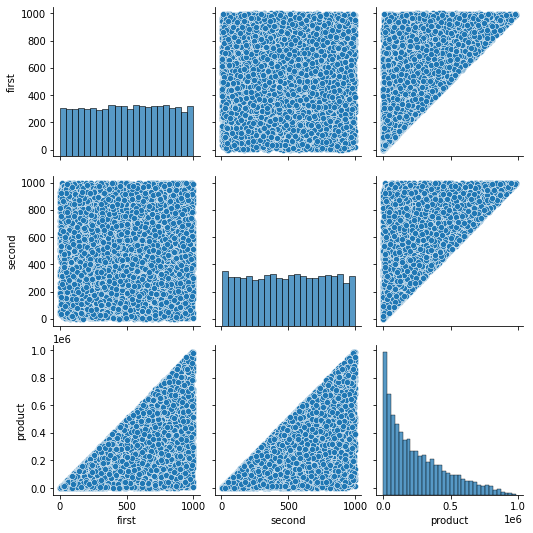

In [164]:
sns.pairplot(data=df)

In [165]:
df[['log first', 'log second', 'log product']] = np.log2(df[['first', 'second', 'product']])
X_train_scaled = df[['log first', 'log second']]
y = df['log product']
df.head()

,first,second,product,log first,log second,log product
0,736,811,596896,9.523562,9.663558,19.187120
1,307,551,169157,8.262095,9.105909,17.368003
2,392,337,132104,8.614710,8.396605,17.011315
3,712,509,362408,9.475733,8.991522,18.467255
4,499,803,400697,8.962896,9.649256,18.612152


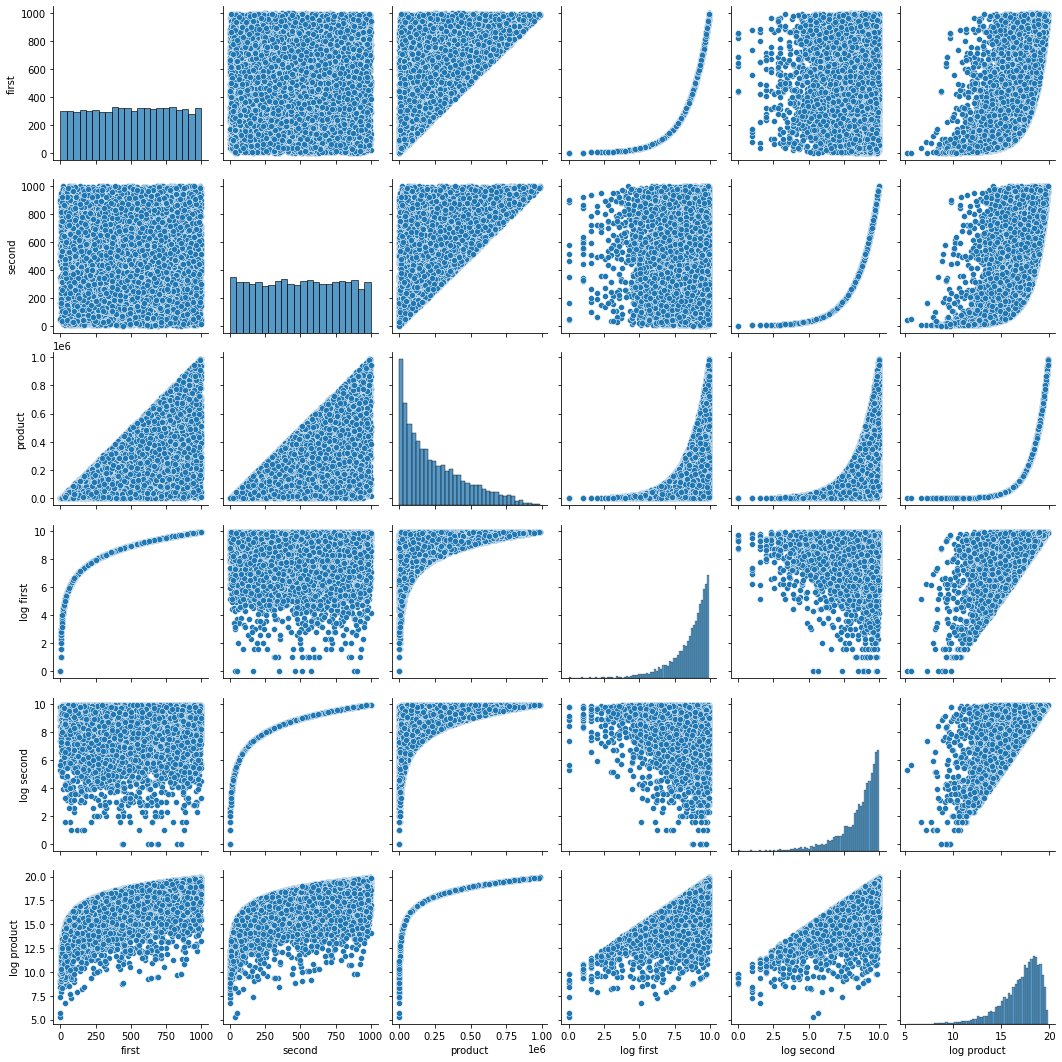

In [166]:
sns.pairplot(data=df)

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y, test_size=0.33, random_state=42)

In [168]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [169]:
model = Sequential()
model.add(Dense(6, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [170]:
model.fit(x=X_train, y=y_train, epochs=250, verbose=1)

Epoch 1/250
210/210 [==============================] - 0s 629us/step - loss: 52.8886
Epoch 2/250
210/210 [==============================] - 0s 576us/step - loss: 0.0518
Epoch 3/250
210/210 [==============================] - 0s 553us/step - loss: 0.0071
Epoch 4/250
210/210 [==============================] - 0s 560us/step - loss: 0.0049
Epoch 5/250
210/210 [==============================] - 0s 552us/step - loss: 0.0034
Epoch 6/250
210/210 [==============================] - 0s 554us/step - loss: 0.0024
Epoch 7/250
210/210 [==============================] - 0s 566us/step - loss: 0.0017
Epoch 8/250
210/210 [==============================] - 0s 583us/step - loss: 0.0012
Epoch 9/250
210/210 [==============================] - 0s 566us/step - loss: 8.7793e-04
Epoch 10/250
210/210 [==============================] - 0s 583us/step - loss: 6.8368e-04
Epoch 11/250
210/210 [==============================] - 0s 601us/step - loss: 5.2948e-04
Epoch 12/250
210/210 [==============================] - 0s 58

210/210 [==============================] - 0s 598us/step - loss: 3.6730e-05
Epoch 94/250
210/210 [==============================] - 0s 585us/step - loss: 1.9690e-05
Epoch 95/250
210/210 [==============================] - 0s 597us/step - loss: 2.9264e-05
Epoch 96/250
210/210 [==============================] - 0s 592us/step - loss: 1.5359e-05
Epoch 97/250
210/210 [==============================] - 0s 594us/step - loss: 1.8919e-05
Epoch 98/250
210/210 [==============================] - 0s 595us/step - loss: 3.1072e-05
Epoch 99/250
210/210 [==============================] - 0s 594us/step - loss: 1.2847e-05
Epoch 100/250
210/210 [==============================] - 0s 609us/step - loss: 2.7806e-05
Epoch 101/250
210/210 [==============================] - 0s 597us/step - loss: 2.2812e-05
Epoch 102/250
210/210 [==============================] - 0s 604us/step - loss: 2.3125e-05
Epoch 103/250
210/210 [==============================] - 0s 593us/step - loss: 1.8550e-05
Epoch 104/250
210/210 [=======

210/210 [==============================] - 0s 614us/step - loss: 6.2499e-06
Epoch 185/250
210/210 [==============================] - 0s 584us/step - loss: 2.3174e-05
Epoch 186/250
210/210 [==============================] - 0s 600us/step - loss: 4.1103e-05
Epoch 187/250
210/210 [==============================] - 0s 576us/step - loss: 3.0329e-06
Epoch 188/250
210/210 [==============================] - 0s 599us/step - loss: 2.5920e-05
Epoch 189/250
210/210 [==============================] - 0s 603us/step - loss: 8.1055e-06
Epoch 190/250
210/210 [==============================] - 0s 585us/step - loss: 1.8296e-05
Epoch 191/250
210/210 [==============================] - 0s 569us/step - loss: 2.4438e-05
Epoch 192/250
210/210 [==============================] - 0s 574us/step - loss: 2.0941e-05
Epoch 193/250
210/210 [==============================] - 0s 622us/step - loss: 2.2407e-05
Epoch 194/250
210/210 [==============================] - 0s 586us/step - loss: 2.2919e-05
Epoch 195/250
210/210 [=

<AxesSubplot:>

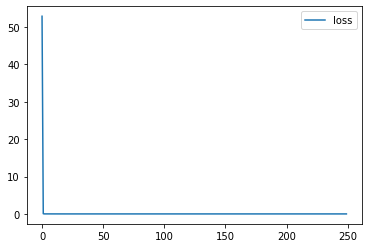

In [171]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [172]:
test_predictions = model.predict(X_test)

In [173]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [174]:
mean_absolute_error(y_test, test_predictions)

0.0010675526114241399

In [175]:
mean_squared_error(y_test, test_predictions)

1.482498183577823e-06

In [176]:
2**model.predict(np.log2(pd.DataFrame({'first':[5],'second':[3]})))[0][0]

15.003014995234551

In [177]:
from tensorflow.keras.models import load_model

In [179]:
model.save('MultiplicationBot.h5')